In [1]:
%run supportvectors-common.ipynb

# Tidy Data


<center><i>"Happy families are all alike; every unhappy family is unhappy in its own way"  - Leo Tolstoy<i></center>
<br>

Similar to the quote, tidy data are all alike while messy data is messy in many ways! It has been said that 80% of data analysis is spent in cleaning and preparing the data [(Dasu and Johnson 2003)](#Dasu_Johnson_2003). Many of you may have faced similar challenges while working with datasets before.
Tidy data is a formal concept and not merely aestheic preferences.

## Learning goal
    
By the end of this session, you should have learned to: 

* Understand the structure and semantics of a dataset
* Learn the features of tidy data
* Manipulate messy data to restructure it into tidy data.

This notebook is a summary of Hadley Wickham's paper <a href="http://vita.had.co.nz/papers/tidy-data.pdf">Tidy Data</a>. The principles of tidy data provide a standard way to organize data values within a dataset. 
Let's first look at the **Structure and the Semantics** of a dataset.
    

In [2]:
import pandas as pd
import numpy as np

# paths to the most commonly used dataset repositories for this lab

# path to pandas_for_everyone datasets repository
pfe_rep_path = 'https://raw.githubusercontent.com/chendaniely/pandas_for_everyone/master/data/'

# path to SupportVectors data-wrangling-datasets repository
sv_rep_path = 'https://raw.githubusercontent.com/supportvectors/data-wrangling-datasets/main/'

## Data Structure

The data structure refers to the physical layout of data. Generally data is structured in tables with rows and columns. The same data can be structured in many ways. 1.1.1 and 1.1.2 show the same data structured in two different ways.

In [3]:
data = {'Year': {19: 2019,
                 20: 2020, 
                 21: 2021, 
                 22: 2022},
        'Australian Open': {19: 'Novak Djokovic',
                            20: 'Novak Djokovic',
                            21: 'Novak Djokovic',
                            22: 'Rafael Nadal'},
        'French Open': {19: 'Rafael Nadal',
                        20: 'Rafael Nadal',
                        21: 'Novak Djokovic',
                        },
        'U.S. Open': {19: 'Rafael Nadal',
                      20: 'Dominic Thiem',
                      21: 'Daniil Medvedev',
                      },
        'Wimbledon': {19: 'Novak Djokovic', 
                      21: 'Novak Djokovic', 
                      }
       }

### Typical data presentation

In [4]:
#1.1.1
df = pd.DataFrame(data)
df

,Year,Australian Open,French Open,U.S. Open,Wimbledon
19,2019,Novak Djokovic,Rafael Nadal,Rafael Nadal,Novak Djokovic
20,2020,Novak Djokovic,Rafael Nadal,Dominic Thiem,NaN
21,2021,Novak Djokovic,Novak Djokovic,Daniil Medvedev,Novak Djokovic
22,2022,Rafael Nadal,NaN,NaN,NaN


This structure is easy and intuitive for data entry and presentation. Most datasets will have this structure. 

### Data restructured

Using transpose command , the columns and rows are switched.

In [5]:
#1.1.2
df.transpose()

,19,20,21,22
Year,2019,2020,2021,2022
Australian Open,Novak Djokovic,Novak Djokovic,Novak Djokovic,Rafael Nadal
French Open,Rafael Nadal,Rafael Nadal,Novak Djokovic,NaN
U.S. Open,Rafael Nadal,Dominic Thiem,Daniil Medvedev,NaN
Wimbledon,Novak Djokovic,NaN,Novak Djokovic,NaN


This is another way to structure the same data. Now, what does this data describe? Is it explicitly clear what the values in the tables are?

Let's work on restructuring the data to make more sense.

## Data Semantics

Data semantics refers to the meaning that the data hold. A dataset has **variables** and its realized **values**. 

 <i> Values are organized in two ways. Every value belongs to a variable and an observation. A variable contains all values that measure the same underlying attribute (like height, temperature, duration) across units. [Wickham (2014)](#Wickham_2014)
    
A dataset contains **values** that are either **categorical** or **numerical**. 

### Restructure the dataframe according to the sematics    
    
    
The following table restructures the data from 1.1.1 and 1.1.2 to make the values, variables, and observations clearer. In th dataframe below, The variables are

* `Year` with values from 2019 - 2022
* `Tournament` with four values
* `Player` with winners from tournaments of each year

We have three variables and their corresponding observations. With this structure, it is clear that winners for every combination of `Year` and `Tournament` are recorded.    
    
Take a moment
    
We create the dataframe using a python dictionary for this example

In [6]:
data_restructured = {'Year': {0: 2019,
                              1: 2019,
                              2: 2019,
                              3: 2019,
                              4: 2020,
                              5: 2020,
                              6: 2020,
                              7: 2020,
                              8: 2021,
                              9: 2021,
                              10: 2021,
                              11: 2021,
                              12: 2022,
                              13: 2022,
                              14: 2022,
                              15: 2022},
                     'Tournament': {0: 'Australian Open',
                                    1: 'French Open',
                                    2: 'U.S. Open',
                                    3: 'Wimbledon',
                                    4: 'Australian Open',
                                    5: 'French Open',
                                    6: 'U.S. Open',
                                    7: 'Wimbledon',
                                    8: 'Australian Open',
                                    9: 'French Open',
                                    10: 'U.S. Open',
                                    11: 'Wimbledon',
                                    12: 'Australian Open',
                                    13: 'French Open',
                                    14: 'U.S. Open',
                                    15: 'Wimbledon'},
                     'Winner': {0: 'Novak Djokovic',
                                1: 'Rafael Nadal',
                                2: 'Rafael Nadal',
                                3: 'Novak Djokovic',
                                4: 'Novak Djokovic',
                                5: 'Rafael Nadal',
                                6: 'Dominic Thiem',
                                8: 'Novak Djokovic',
                                9: 'Novak Djokovic',
                                10: 'Daniil Medvedev',
                                11: 'Novak Djokovic',
                                12: 'Rafael Nadal',
                               }
                    }

df = pd.DataFrame(data_restructured)
df

,Year,Tournament,Winner
0,2019,Australian Open,Novak Djokovic
1,2019,French Open,Rafael Nadal
2,2019,U.S. Open,Rafael Nadal
3,2019,Wimbledon,Novak Djokovic
4,2020,Australian Open,Novak Djokovic
5,2020,French Open,Rafael Nadal
6,2020,U.S. Open,Dominic Thiem
7,2020,Wimbledon,NaN
8,2021,Australian Open,Novak Djokovic
9,2021,French Open,Novak Djokovic


 It can be noted that now it is easier to determine what to do with the missing values. This structure helps us understand the meaning of the data better. Let's next formally describe tidy data.

## What is Tidy Data?

Data organized in a tidy format should provide an easy link between the `structure` and `semantics` of a dataset. 
In Tidy Data:

* Each variable forms a column
* **Each observation forms a row**
* Each type of observational unit forms a table

Data arranged in any other form is messy.
From the previous example, one observes that each row represents an observation, 

**<center>the `winner` of one `Tournament`of one `Year`</center>**
and each column is a variable.

## Tidying messy data

Messy data comes in all forms! We will address the five cases that are encountered often. 
1.  Column headers are values, not variable names.
2.  Multiple variables are stored in one column.
3.  Variables are stored in both rows and columns.
4.  Multiple types of observational units are stored in the same table.
5. A single observational unit is stored in multiple tables.

Most messy data can be tidied up using three tools: 
1. Melt/Unpivot/Gather columns into rows, 
2. Cast/Pivot/Spread rows into columns,
3. String splitting

We will learn these tools as we progress through the 5 cases.

### Column headers are values, not variable names

This is one of the most common cases.

#### Pew dataset

This dataset explores the relationship between income and religion in the US created by the Pew research center. This is a small dataset, so lets view the entire DataFrame.

In [7]:
source = pfe_rep_path + "pew.csv"
pew_df = pd.read_csv(source)

pew_df

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116
5,Evangelical Prot,575,869,1064,982,881,1486,949,723,414,1529
6,Hindu,1,9,7,9,11,34,47,48,54,37
7,Historically Black Prot,228,244,236,238,197,223,131,81,78,339
8,Jehovah's Witness,20,27,24,24,21,30,15,11,6,37
9,Jewish,19,19,25,25,30,95,69,87,151,162


Are these columns:  {`<$10k`,	`$10-20k`,	`$20-30k`,	`$30-40k`,	`$40-50k`,	`$50-75k`,	`$75-100k`,	`$100-150k`	`>150k`, `Don't know/refused`} variables or values? Do they fall under a common classification?

Our DataFrame can be compared to the image on the left.

Data|Molten data
-|-
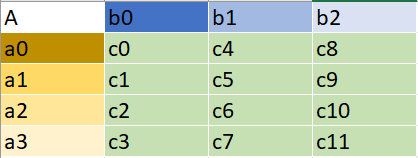|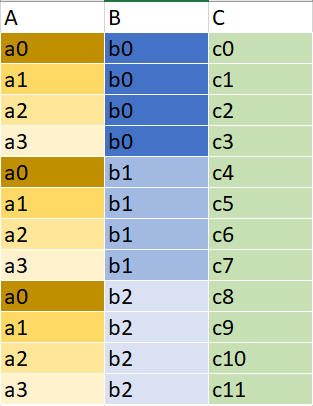

This dataset consists of three variables:

1. `Religion`
2. `Income`
3. `Frequency`

Therefore each observation should be a record of the `frequency` of one range of `income` per `religion`. In order to do this we must `melt` the data. Melting is the process of gathering columns into rows. Let's explore this with a dummy dataset.


#### Melting/Unpivot/Gather columns into rows

In [8]:
dummy_dict = {'ID' : {0:'A', 1:'B', 2:'C'},
              'a' : {0:1, 1:2, 2:3},
              'b' : {0:4, 1:5, 2:6},
              'c' : {0:7, 1:8, 2:9}
             }

dummy_raw = pd.DataFrame(dummy_dict)
dummy_raw

,ID,a,b,c
0,A,1,4,7
1,B,2,5,8
2,C,3,6,9


Let `a`, `b`, and `c` be values and not variables. Melting is parameterised by a list of columns that are already variables called `colvars`. The rest of the columns are squished into a new column called `variable` and the values are rearraged into the column `values` 

In [9]:
dummy_molten = pd.melt(dummy_raw,
                       id_vars='ID' # the identifier column / colvar 
                      )
dummy_molten

,ID,variable,value
0,A,a,1
1,B,a,2
2,C,a,3
3,A,b,4
4,B,b,5
5,C,b,6
6,A,c,7
7,B,c,8
8,C,c,9


The DataFrame above is a molten data. Let's return to the problem at hand. 


1. Which variable(s) is/are `colvar` in the `pew` dataset? 
2. What shape will the molten dataset have?

In [10]:
pew_df.shape

(18, 11)

In [11]:
pew_df = pd.melt(pew_df,
                      id_vars='religion',
                      var_name='income range', # The name of the variable column
                      value_name='frequency' # The name of the value column
                     )
pew_df 

,religion,income range,frequency
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


### Multiple variables stored in one column

After melting a dataset, it might so happen that more than one variable is stored in a column. Let's look at an example

#### Tuberculosis dataset

This dataset comes from the World Health Organisation, and records the counts of confirmed tuberculosis cases by country, year, and demographic group. The demographic groups are broken down by sex (m, f) and age (0-14, 15-25, 25-34, 35-44,45-54, 55-64, 65plus) for the year 2020. Here's a link to view the country names for the country codes in the dataset: https://en.wikipedia.org/wiki/List_of_ISO_3166_country_codes

In [12]:
source = sv_rep_path + "TB_burden_age_sex_messy.csv"
tb_df = pd.read_csv(source)

# removing the unnamed column
tb_df.drop("Unnamed: 0", axis=1,inplace=True)
tb_df.shape

(214, 25)

Since the DataFrame has many columns let's transpose the dataset and view the top few lines.

In [13]:
tb_df.head().T

,0,1,2,3,4
country,AD,AE,AF,AG,AI
f_0-14,0,0,7100,0,0
f_0-4,0,0,2700,0,0
f_15-24,0,0,7800,0,0
f_15plus,1,24,31086,0,0
f_18plus,0.0,1.0,2100.0,0.0,NaN
f_25-34,0,4,6300,0,0
f_35-44,1,5,4900,0,0
f_45-54,0,5,3900,0,0
f_5-14,0,0,4300,0,0


We observe that each column is a certain `sex_age-range` group. This is not tidy data since a column contains more than one variable.

What are the variables in the DataFrame?

1. country : {AD, AE, ... } 
2. sex: {`m`, `f`}
3. age-range: {0-14, 15-25, 25-34, 35-44,45-54, 55-64, 65plus}

The **semantics** of the dataset: 

Each observation in the dataset records the number of **Cases** of one **Age-group** and one **Sex** of one **Country**. We can modify the structure of the dataset to adhere to the semantics.

We will do this in two steps
1. melt the DataFrame by gathering all the columns except country
2. split `sex_age-range` to `sex` and `age-range`


In [14]:
tb_df = pd.melt(tb_df, 
                      id_vars = 'country', 
                      var_name='column', 
                      value_name='cases'
                     )

tb_df

,country,column,cases
0,AD,f_0-14,0.0
1,AE,f_0-14,0.0
2,AF,f_0-14,7100.0
3,AG,f_0-14,0.0
4,AI,f_0-14,0.0
...,...,...,...
5131,WS,m_all,5.0
5132,YE,m_all,8000.0
5133,ZA,m_all,195000.0
5134,ZM,m_all,37000.0


#### String splitting

We use the string method `split`

In [15]:
split = tb_df['column'].str.split("_",
                                  n = 1,
                                  expand=True
                                 )
split

,0,1
0,f,0-14
1,f,0-14
2,f,0-14
3,f,0-14
4,f,0-14
...,...,...
5131,m,all
5132,m,all
5133,m,all
5134,m,all


In [16]:
tb_df['sex'], tb_df['age_group'] = split[0], split[1] # create two new columns
tb_df.drop('column', axis=1, inplace= True) # drop the 'column' column

tb_df.head()

,country,cases,sex,age_group
0,AD,0.0,f,0-14
1,AE,0.0,f,0-14
2,AF,7100.0,f,0-14
3,AG,0.0,f,0-14
4,AI,0.0,f,0-14


### Variables are stored in both rows and columns.

This is a tricky case where variables are also stored in rows. 

#### Weather Data

This weather data is collected from https://www.ncdc.noaa.gov/cdo-web/ where free access is provided to global historic climate data. For this exercise, we take a subset of the data collected from the New Orleans Lakefront Airport station and purposefully messed it up. Let's view this dataset.

* TMAX = Maximum temperature (Fahrenheit)
* TMIN = Minimum temperature (Fahrenheit)


In [17]:
source = sv_rep_path + "New_Orleans_Lakefront_Airport_weather_2021_messy.csv"

weather_df = pd.read_csv(source)

weather_df.drop('Unnamed: 0', axis=1, inplace=True)

print(weather_df.shape)
weather_df.head()

(24, 35)


,Station,Year,Month,Element,d1,d2,d3,d4,d5,d6,...,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31
0,USW00053917,2021,1,TMAX,69.0,57.0,56.0,68.0,61.0,62.0,...,67.0,63.0,77.0,79.0,73.0,73.0,58.0,59.0,72.0,71.0
1,USW00053917,2021,1,TMIN,56.0,48.0,47.0,44.0,52.0,51.0,...,58.0,58.0,60.0,67.0,61.0,53.0,44.0,46.0,50.0,53.0
2,USW00053917,2021,2,TMAX,58.0,55.0,58.0,72.0,66.0,56.0,...,67.0,70.0,74.0,72.0,82.0,83.0,85.0,NaN,NaN,NaN
3,USW00053917,2021,2,TMIN,45.0,42.0,43.0,47.0,50.0,51.0,...,49.0,46.0,50.0,57.0,60.0,NaN,71.0,NaN,NaN,NaN
4,USW00053917,2021,3,TMAX,76.0,62.0,60.0,67.0,71.0,66.0,...,73.0,75.0,74.0,80.0,84.0,86.0,78.0,71.0,84.0,84.0


The observations in the dataset are records of the minimum and maximum temperatures of each month in 2021 measured from the New Orleans Lakefront Airport station. 

We observe that the variable: `days` is spread out and needs to be melted. Note that the months with less than 31 days have NaN values filled in.

In [18]:
weather_df_molten = weather_df.melt(id_vars=['Station', 'Year', 'Month', 'Element'], var_name = 'Day')
print(weather_df_molten.shape)
weather_df_molten.head()

(744, 6)


,Station,Year,Month,Element,Day,value
0,USW00053917,2021,1,TMAX,d1,69.0
1,USW00053917,2021,1,TMIN,d1,56.0
2,USW00053917,2021,2,TMAX,d1,58.0
3,USW00053917,2021,2,TMIN,d1,45.0
4,USW00053917,2021,3,TMAX,d1,76.0


It may be tricky to spot at first, but TMAX and TMIN are variables and not values. Since the semantics of the dataset informs us that each observation is a record of 

The **Maximum** and **Minimum** temperature on a single **Date** of a single **Station**. Let's modify the structure of the dataset so that TMAX and TMIN are columns.

#### Pivoting a DataFrame

Pivoting is the reverse of melting where rows are spread into columns. We can compare the image on the left to our dataset..

data| pivoted data
-|-
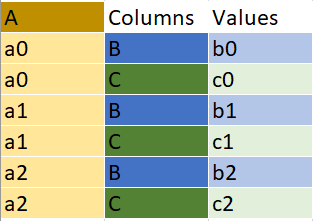| 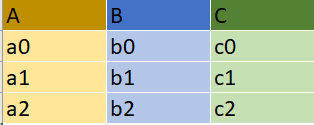

In [19]:
weather_df = weather_df_molten.pivot(index=['Station', 'Year', 'Month', 'Day'], # creates a multi-index DataFrame
                                 columns='Element', 
                                 values='value'
                                )

weather_df.sort_values(['Year', 'Month', 'Day'], inplace=True)
weather_df.head()

Element                     TMAX  TMIN
Station     Year Month Day            
USW00053917 2021 1     d1   69.0  56.0
                       d10  45.0  40.0
                       d11  46.0  41.0
                       d12  44.0  38.0
                       d13  55.0  39.0

The dataframe returned is multi-indexed. We can reshape it by resetting the index.

In [20]:
weather_df = weather_df.reset_index()
weather_df.head()

Element,Station,Year,Month,Day,TMAX,TMIN
0,USW00053917,2021,1,d1,69.0,56.0
1,USW00053917,2021,1,d10,45.0,40.0
2,USW00053917,2021,1,d11,46.0,41.0
3,USW00053917,2021,1,d12,44.0,38.0
4,USW00053917,2021,1,d13,55.0,39.0


Now the data looks tidy enough. However, we can clean it up further. 

1. Convert the columns `Year`, `Month` and `Day` into a `Date` column   
2. Remove the invalid dates.
3. Change the datatype to `DateTime`.

We will use the techniques we learned in the previous labs.

In [21]:
# Remove the 'd' in the Day values
weather_df['Day'] = weather_df['Day'].replace(['d'], value='', regex=True)

# Create a new column 'Date' by combining the Year, Month and Day columns
weather_df['Date'] = weather_df['Day'].astype(str) + '-'+ weather_df['Month'].astype(str) +'-'+ weather_df['Year'].astype(str)

# Convert the datatype to DateTime
weather_df['Date'] = pd.to_datetime(weather_df['Date'],
                                    dayfirst=True, 
                                    errors='coerce', # ignore the errors raised by the invalid dates
                                   )

# View the dates that are null
weather_df[pd.isnull(weather_df['Date'])]

Element,Station,Year,Month,Day,TMAX,TMIN,Date
52,USW00053917,2021,2,29,NaN,NaN,NaT
54,USW00053917,2021,2,30,NaN,NaN,NaT
55,USW00053917,2021,2,31,NaN,NaN,NaT
117,USW00053917,2021,4,31,NaN,NaN,NaT
179,USW00053917,2021,6,31,NaN,NaN,NaT
272,USW00053917,2021,9,31,NaN,NaN,NaT
334,USW00053917,2021,11,31,NaN,NaN,NaT


In [22]:
# Filter out the invalid dates
weather_df = weather_df[pd.notnull(weather_df['Date'])]

# Sort dataframe by dates
weather_df.sort_values(by='Date', inplace=True)

# Drop irrelevant columns
weather_df.drop(['Year', 'Month', 'Day'], axis=1, inplace=True)

# Set `Date` column as the index
weather_df.set_index('Date', inplace=True)

weather_df.head()

Element,Station,TMAX,TMIN
Date,,,
2021-01-01,USW00053917,69.0,56.0
2021-01-02,USW00053917,57.0,48.0
2021-01-03,USW00053917,56.0,47.0
2021-01-04,USW00053917,68.0,44.0
2021-01-05,USW00053917,61.0,52.0


### Multiple types of observational units are stored in the same table.

#### Billboard Dataset

The Billboard dataset records the date a song first entered the Billboard Top 100. From this date, the song's ratings are tracked for 75 weeks. It also contains information about the artist, song duration, and the year it was released. Let's take a look at the dataset.

In [23]:
source = pfe_rep_path + "billboard.csv"
billboard_df= pd.read_csv(source)

print (billboard_df.shape)

(317, 81)


Since there are around 81 columns, Let's view a subset of the head of the DataFrame.

In [24]:
billboard_df.iloc[0:5, 0:16].T

,0,1,2,3,4
year,2000,2000,2000,2000,2000
artist,2 Pac,2Ge+her,3 Doors Down,3 Doors Down,504 Boyz
track,Baby Don't Cry (Keep...,The Hardest Part Of ...,Kryptonite,Loser,Wobble Wobble
time,4:22,3:15,3:53,4:24,3:35
date.entered,2000-02-26,2000-09-02,2000-04-08,2000-10-21,2000-04-15
wk1,87,91,81,76,57
wk2,82.0,87.0,70.0,76.0,34.0
wk3,72.0,92.0,68.0,72.0,25.0
wk4,77.0,NaN,67.0,69.0,17.0
wk5,87.0,NaN,66.0,67.0,17.0


As a first, we notice that all the columns with `wk*` can be gathered. 

In [25]:
billboard_molten_df = pd.melt(billboard_df,
                      id_vars=['year', 'artist', 'track', 'time', 'date.entered'], 
                      var_name='week', 
                      value_name='rating'
                     )

billboard_molten_df

,year,artist,track,time,date.entered,week,rating
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0
...,...,...,...,...,...,...,...
24087,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,wk76,NaN
24088,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,wk76,NaN
24089,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,wk76,NaN
24090,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,wk76,NaN


Since we've melted the DataFrame, for each song there are 75 rows. 

Each observation records the **rating** of one song for each **week** from week 1 to week 75.

The details on each song, i.e, the `year`, `artist`, `track` and `time` are repeated 75 times for each song. These details are redundant and can be stored in a separate DataFrame.  

In [26]:
billboard_molten_df[billboard_molten_df['track'] == 'Loser']

,year,artist,track,time,date.entered,week,rating
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
320,2000,3 Doors Down,Loser,4:24,2000-10-21,wk2,76.0
637,2000,3 Doors Down,Loser,4:24,2000-10-21,wk3,72.0
954,2000,3 Doors Down,Loser,4:24,2000-10-21,wk4,69.0
1271,2000,3 Doors Down,Loser,4:24,2000-10-21,wk5,67.0
...,...,...,...,...,...,...,...
22510,2000,3 Doors Down,Loser,4:24,2000-10-21,wk72,NaN
22827,2000,3 Doors Down,Loser,4:24,2000-10-21,wk73,NaN
23144,2000,3 Doors Down,Loser,4:24,2000-10-21,wk74,NaN
23461,2000,3 Doors Down,Loser,4:24,2000-10-21,wk75,NaN


We subset the billboard_molten_df which contains the details on the songs.

In [27]:
billboard_songs_df = billboard_molten_df[['year', 'artist', 'track', 'time']]
billboard_songs_df

,year,artist,track,time
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22
1,2000,2Ge+her,The Hardest Part Of ...,3:15
2,2000,3 Doors Down,Kryptonite,3:53
3,2000,3 Doors Down,Loser,4:24
4,2000,504 Boyz,Wobble Wobble,3:35
...,...,...,...,...
24087,2000,Yankee Grey,Another Nine Minutes,3:10
24088,2000,"Yearwood, Trisha",Real Live Woman,3:55
24089,2000,Ying Yang Twins,Whistle While You Tw...,4:19
24090,2000,Zombie Nation,Kernkraft 400,3:30


We know that this information is repeated 75 times. Let's drop the duplicates

In [28]:
billboard_songs_df = billboard_songs_df.drop_duplicates()
billboard_songs_df

,year,artist,track,time
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22
1,2000,2Ge+her,The Hardest Part Of ...,3:15
2,2000,3 Doors Down,Kryptonite,3:53
3,2000,3 Doors Down,Loser,4:24
4,2000,504 Boyz,Wobble Wobble,3:35
...,...,...,...,...
312,2000,Yankee Grey,Another Nine Minutes,3:10
313,2000,"Yearwood, Trisha",Real Live Woman,3:55
314,2000,Ying Yang Twins,Whistle While You Tw...,4:19
315,2000,Zombie Nation,Kernkraft 400,3:30


To provide a link between the `billboard_songs_df` and `billboard_ratings_df`, let's create a column common to both DataFrames called `ID`. 

In [29]:
billboard_songs_df['id'] = [i for i in range(len(billboard_songs_df['track']))]
billboard_songs_df

,year,artist,track,time,id
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,1
2,2000,3 Doors Down,Kryptonite,3:53,2
3,2000,3 Doors Down,Loser,4:24,3
4,2000,504 Boyz,Wobble Wobble,3:35,4
...,...,...,...,...,...
312,2000,Yankee Grey,Another Nine Minutes,3:10,312
313,2000,"Yearwood, Trisha",Real Live Woman,3:55,313
314,2000,Ying Yang Twins,Whistle While You Tw...,4:19,314
315,2000,Zombie Nation,Kernkraft 400,3:30,315


To apply `id` to `billboard_molten_df`, Let's merge(join) these two Dataframes on the common columns.

In [30]:
billboard_molten_df = billboard_molten_df.merge(billboard_songs_df, on=['year', 'artist', 'track', 'time'])
billboard_molten_df

,year,artist,track,time,date.entered,week,rating,id
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0,0
1,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk2,82.0,0
2,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk3,72.0,0
3,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk4,77.0,0
4,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk5,87.0,0
...,...,...,...,...,...,...,...,...
24087,2000,matchbox twenty,Bent,4:12,2000-04-29,wk72,NaN,316
24088,2000,matchbox twenty,Bent,4:12,2000-04-29,wk73,NaN,316
24089,2000,matchbox twenty,Bent,4:12,2000-04-29,wk74,NaN,316
24090,2000,matchbox twenty,Bent,4:12,2000-04-29,wk75,NaN,316


We store the ratings related data in a separate DataFrame by subsetting.

In [31]:
billboard_ratings_df = billboard_molten_df[['id', 'date.entered', 'week', 'rating']]
billboard_ratings_df

,id,date.entered,week,rating
0,0,2000-02-26,wk1,87.0
1,0,2000-02-26,wk2,82.0
2,0,2000-02-26,wk3,72.0
3,0,2000-02-26,wk4,77.0
4,0,2000-02-26,wk5,87.0
...,...,...,...,...
24087,316,2000-04-29,wk72,NaN
24088,316,2000-04-29,wk73,NaN
24089,316,2000-04-29,wk74,NaN
24090,316,2000-04-29,wk75,NaN


We know that not all songs stay in the Top 100 for 75 weeks. We can drop the rows that contain NaN values in the ratings column.

In [32]:
billboard_ratings_df = billboard_ratings_df[pd.notnull(billboard_ratings_df['rating'])]

billboard_ratings_df

,id,date.entered,week,rating
0,0,2000-02-26,wk1,87.0
1,0,2000-02-26,wk2,82.0
2,0,2000-02-26,wk3,72.0
3,0,2000-02-26,wk4,77.0
4,0,2000-02-26,wk5,87.0
...,...,...,...,...
24050,316,2000-04-29,wk35,33.0
24051,316,2000-04-29,wk36,37.0
24052,316,2000-04-29,wk37,38.0
24053,316,2000-04-29,wk38,38.0


Finally we manipulate the `date.entered` and `week` columns to create a new column to keep track of the `date` of the ratings.

In [33]:
from datetime import timedelta

# remove 'wk' from the week values 
billboard_ratings_df['week'] = billboard_ratings_df['week'].replace('[wk]', '', regex=True).astype(int)

# Convert the 'date.entered' column to 'DateTime' datatype
billboard_ratings_df['date.entered'] = pd.to_datetime(billboard_ratings_df['date.entered'], format='%Y-%m-%d')

# Create a new column 'date' that keeps track of the date of the rating
billboard_ratings_df['date'] = [row['date.entered']+timedelta(weeks=row['week']) for index,row in billboard_ratings_df.iterrows()]

# remove redundant columns
billboard_ratings_df = billboard_ratings_df.drop(['date.entered', 'week'], axis=1)

billboard_ratings_df

,id,rating,date
0,0,87.0,2000-03-04
1,0,82.0,2000-03-11
2,0,72.0,2000-03-18
3,0,77.0,2000-03-25
4,0,87.0,2000-04-01
...,...,...,...
24050,316,33.0,2000-12-30
24051,316,37.0,2001-01-06
24052,316,38.0,2001-01-13
24053,316,38.0,2001-01-20


In [34]:
# The dataframe with just the song information
billboard_songs_df

,year,artist,track,time,id
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,1
2,2000,3 Doors Down,Kryptonite,3:53,2
3,2000,3 Doors Down,Loser,4:24,3
4,2000,504 Boyz,Wobble Wobble,3:35,4
...,...,...,...,...,...
312,2000,Yankee Grey,Another Nine Minutes,3:10,312
313,2000,"Yearwood, Trisha",Real Live Woman,3:55,313
314,2000,Ying Yang Twins,Whistle While You Tw...,4:19,314
315,2000,Zombie Nation,Kernkraft 400,3:30,315


### A single observational unit is stored in multiple tables.

#### Grand Slam Winners dataset

This is a collection of two datasets. 

grand_slam_winners_men.csv : Each observation is a record of the **winner** of one **men's Grand Slam tournament** of one **year**. 

grand_slam_winners_women.csv : 
Each observation is a record of the **winner** of one **women's Grand Slam tournament** of one **year**. 

In [35]:
gs_men = sv_rep_path + 'grand_slam_winners_men.csv'
gs_men_df = pd.read_csv(gs_men)
gs_men_df

,Year,Tournament,Winner
0,2022,Australian Open,Rafael Nadal
1,2021,U.S. Open,Daniil Medvedev
2,2021,Wimbledon,Novak Djokovic
3,2021,French Open,Novak Djokovic
4,2021,Australian Open,Novak Djokovic
...,...,...,...
83,2001,Australian Open,Andre Agassi
84,2000,U.S. Open,Marat Safin
85,2000,Wimbledon,Pete Sampras
86,2000,French Open,Gustavo Kuerten


In [36]:
gs_women = sv_rep_path + 'grand_slam_winners_women.csv'
gs_women_df = pd.read_csv(gs_women)
gs_women_df

,Year,Tournament,Winner
0,2022,Australian Open,Ashleigh Barty
1,2021,U.S. Open,Emma Raducanu
2,2021,Wimbledon,Ashleigh Barty
3,2021,French Open,Barbora Krejcikova
4,2021,Australian Open,Naomi Osaka
...,...,...,...
83,2001,Australian Open,Jennifer Capriati
84,2000,U.S. Open,Venus Williams
85,2000,Wimbledon,Venus Williams
86,2000,French Open,Mary Pierce


Here the observational units are the same with the only difference being the `Sex`. These dataframes can be combined together easily by adding a column `Sex` with their respective values and concatenating. 

In [37]:
# Create a column 'Sex' with all values = 'men'
gs_men_df['Sex'] = 'men'

# Create a column 'Sec' with all values = 'women'
gs_women_df['Sex'] = 'women'

In [38]:
gs_men_df

,Year,Tournament,Winner,Sex
0,2022,Australian Open,Rafael Nadal,men
1,2021,U.S. Open,Daniil Medvedev,men
2,2021,Wimbledon,Novak Djokovic,men
3,2021,French Open,Novak Djokovic,men
4,2021,Australian Open,Novak Djokovic,men
...,...,...,...,...
83,2001,Australian Open,Andre Agassi,men
84,2000,U.S. Open,Marat Safin,men
85,2000,Wimbledon,Pete Sampras,men
86,2000,French Open,Gustavo Kuerten,men


In [39]:
gs_women_df

,Year,Tournament,Winner,Sex
0,2022,Australian Open,Ashleigh Barty,women
1,2021,U.S. Open,Emma Raducanu,women
2,2021,Wimbledon,Ashleigh Barty,women
3,2021,French Open,Barbora Krejcikova,women
4,2021,Australian Open,Naomi Osaka,women
...,...,...,...,...
83,2001,Australian Open,Jennifer Capriati,women
84,2000,U.S. Open,Venus Williams,women
85,2000,Wimbledon,Venus Williams,women
86,2000,French Open,Mary Pierce,women


In [40]:
gs_df = pd.concat([gs_women_df , gs_men_df])
gs_df

,Year,Tournament,Winner,Sex
0,2022,Australian Open,Ashleigh Barty,women
1,2021,U.S. Open,Emma Raducanu,women
2,2021,Wimbledon,Ashleigh Barty,women
3,2021,French Open,Barbora Krejcikova,women
4,2021,Australian Open,Naomi Osaka,women
...,...,...,...,...
83,2001,Australian Open,Andre Agassi,men
84,2000,U.S. Open,Marat Safin,men
85,2000,Wimbledon,Pete Sampras,men
86,2000,French Open,Gustavo Kuerten,men


And we're done!

#  References


<a id='Dasu_Johnson_2003'>Dasu T, Johnson T (2003). Exploratory Data Mining and Data Cleaning. Wiley-IEEE.</a>

<a id='Wickham_2014'>Wickham H (2014). Tidy Data. Journal of Statistical Software.</a>